In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\ML PROJECT\LungCapData.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [3]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [4]:
df.shape

(725, 6)

In [16]:

df. info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [17]:
df.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoder = LabelEncoder()

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains categorical data
        df[column] = label_encoder.fit_transform(df[column])

In [21]:
df.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [22]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    int32  
 4   Gender     725 non-null    int32  
 5   Caesarean  725 non-null    int32  
dtypes: float64(2), int32(3), int64(1)
memory usage: 25.6 KB


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_train,df_test = train_test_split(df, test_size=0.25)

In [25]:
df_train_x = df_train.iloc[: , 1::]
df_train_y = df_train.iloc[: , 0]

In [26]:
df_train_x.head()

,Age,Height,Smoke,Gender,Caesarean
285,11,66.9,0,0,1
437,14,67.7,0,0,0
302,10,59.7,0,1,0
347,12,55.0,0,0,0
359,7,56.3,0,1,0


In [27]:
df_train_y.head()

285    6.200
437    8.425
302    6.550
347    5.025
359    3.675
Name: LungCap, dtype: float64

In [28]:
df_test_x = df_test.iloc[: , 1::]
df_test_y = df_test.iloc[: , 0]

In [29]:
df_test_x.head()

,Age,Height,Smoke,Gender,Caesarean
200,13,68.6,0,1,0
122,17,78.6,0,1,1
245,6,55.1,0,0,0
213,15,66.4,0,0,0
307,14,69.4,0,0,0


In [30]:
df_test_x.shape

(182, 5)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lin_reg = LinearRegression()

In [33]:
lin_reg.fit(df_train_x , df_train_y)

LinearRegression()

In [35]:
pred_train = lin_reg.predict(df_train_x) 
pred_test = lin_reg .predict(df_test_x)

In [36]:
pred_train

array([ 7.93035468,  8.74885441,  6.42915866,  5.05374477,  5.06212741,
        5.01556454,  7.07472845,  8.76873592,  6.46785698,  5.84948664,
        7.51131743,  5.55468172,  9.65028556, 10.94431246,  8.13023883,
       10.2898464 ,  6.7040767 ,  7.13619559,  7.95521341,  7.40850452,
        6.3041291 ,  6.30148702,  3.94831005,  9.70206552,  7.85007073,
        5.05453569,  5.02864618, 11.07747941,  6.17594476,  9.77689251,
        8.39598776,  9.25006513, 10.14308511,  8.15612927,  3.27341144,
        8.94870559,  7.12129131,  7.01614864,  9.43735274,  7.04283   ,
       10.27126946,  7.97667768,  9.48233284,  7.51839013,  9.31022771,
        6.40429994,  7.15504537,  2.80176941, 11.55774393,  8.5756846 ,
       11.47089998,  4.45419124,  7.62302011,  9.40387152,  3.30167558,
        8.95028836,  2.62179974,  7.7428272 ,  8.81688155,  4.05397081,
        3.31499708,  9.27046471, 10.81248842,  8.44334248,  8.13807041,
        4.00167278,  6.97089032,  7.32245149,  7.25130367,  7.81

In [37]:
pred_test

array([ 9.26366485, 12.39977043,  4.16069626,  8.55528502,  9.20243757,
        5.6276531 ,  7.7289537 ,  7.94999632,  4.43537443,  3.94854991,
        8.04833913,  5.40112057, 12.96505627,  3.07984204,  7.59633875,
       10.48262488,  8.53880892,  6.61802367,  7.52336736,  7.76844387,
       12.34640771,  9.27595464,  8.15506458,  6.91464028,  7.03496545,
        8.05620368,  5.18375713,  7.83488823, 10.24249262,  7.03627   ,
       10.49752916, 11.71103224,  8.54457262, 10.62963142, 12.29122235,
        5.99569687,  7.56965738, 10.00236036,  7.09749728,  4.36213021,
       10.83734714,  9.89749052, 11.16325866,  5.75608269,  9.1503794 ,
        7.44146766,  6.92274469,  4.34224871,  3.39373661,  9.45043439,
        7.5094948 ,  6.9878845 ,  7.06219342, 11.35630998,  5.58109024,
        5.29545981,  5.76968241,  7.31644348,  2.4957394 , 10.07718736,
       10.93727273, 13.55204624, 10.91766407, 10.88573264,  3.24673008,
        8.06379446,  5.6825986 ,  8.46895915,  4.41391016,  8.41

In [39]:
Rsq=lin_reg.score(df_train_x, df_train_y)
Rsq

0.8487666244239775

In [42]:
N = df_train_x.shape[0]
K = df_train_x.shape[1]

In [41]:
df_train_x.shape

(543, 5)

In [44]:
Adj_Rsq = 1-(1-Rsq)*(N-1)/(N-K-1)
Adj_Rsq

0.847358492435374

In [46]:
err_train = df_train_y - pred_train
err_test = df_test_y - pred_test

In [47]:
mse = np.mean(np.square(err_test))
mse

1.0035482003121086

In [48]:
rmse=np.sqrt(mse)
rmse

1.0017725292261255

In [50]:
mape = np.mean(np.abs(err_test*100/df_test_y))
mape

12.403444691147918

In [51]:
np.mean(err_train)

-4.6780668146268105e-16

In [52]:
import matplotlib.pyplot as plt

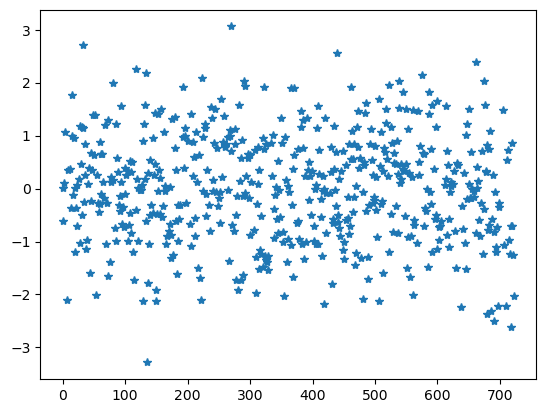

In [53]:
plt.plot(err_train , "*")

(array([ 1.,  0.,  3., 14., 10., 20., 30., 50., 59., 54., 66., 68., 51.,
        44., 31., 21., 14.,  4.,  2.,  1.]),
 array([-3.28357613, -2.96637218, -2.64916822, -2.33196427, -2.01476031,
        -1.69755636, -1.38035241, -1.06314845, -0.7459445 , -0.42874055,
        -0.11153659,  0.20566736,  0.52287132,  0.84007527,  1.15727922,
         1.47448318,  1.79168713,  2.10889109,  2.42609504,  2.74329899,
         3.06050295]),
 <BarContainer object of 20 artists>)

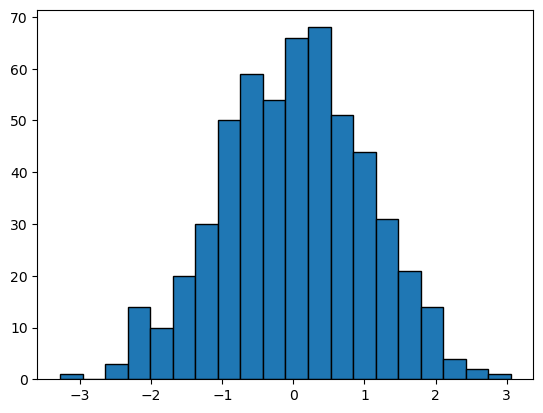

In [54]:
plt.hist(err_train , bins=20, edgecolor="black")

In [55]:
pred_actual_df = pd.DataFrame()
pred_actual_df["Actual"]= df_train_y
pred_actual_df['predict']= pred_train

pred_actual_df.shape

(543, 2)

In [56]:
pred_actual_df.head()

,Actual,predict
285,6.200,7.930355
437,8.425,8.748854
302,6.550,6.429159
347,5.025,5.053745
359,3.675,5.062127


In [58]:
import seaborn as sns

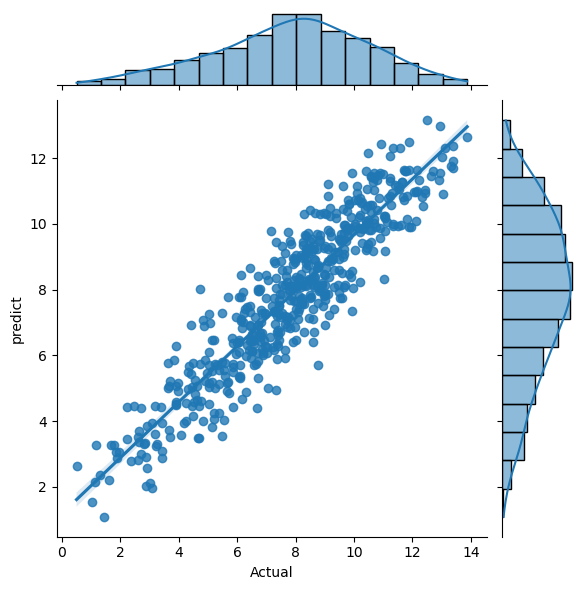

In [59]:
sns.jointplot(x='Actual' ,y="predict" , data = pred_actual_df , kind= 'reg')